In [1]:
import numpy as np
import pandas as pd

import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data
data.head(5)

,Weight,Feed,Time,Pig,Evit,Cu,Litter
0,26.50000,NaN,1,4601,1,1,1
1,27.59999,5.200005,2,4601,1,1,1
2,36.50000,17.600000,3,4601,1,1,1
3,40.29999,28.500000,4,4601,1,1,1
4,49.09998,45.200001,5,4601,1,1,1


In [54]:
pd.DataFrame({k:list(set(df['Cu']))
              for k,df in data.groupby('Pig')}).T[0].value_counts()

2    25
3    24
1    23
Name: 0, dtype: int64

In [55]:
pd.DataFrame({k:list(set(df['Evit']))
              for k,df in data.groupby('Pig')}).T[0].value_counts()

3    25
2    24
1    23
Name: 0, dtype: int64

In [11]:
data.Cu.value_counts()

2    300
3    287
1    274
Name: Cu, dtype: int64

/Users/cmartino/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/cmartino/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


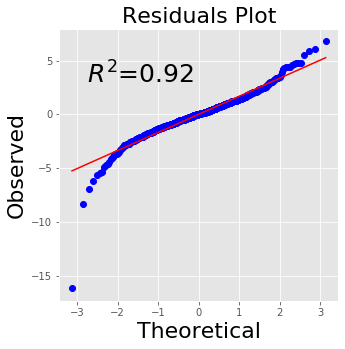

In [31]:
fml = "Weight ~ Feed + Cu + Time + Cu:Time"
md = sm.MixedLM.from_formula(fml, data, re_formula="Time", groups=data["Pig"], missing='drop')
mdf = md.fit()

fig, ax = plt.subplots(1,1,figsize=(5,5))

_, (__, ___, r) = sp.stats.probplot(mdf.resid, plot=ax, fit=True)
ax.annotate('$R^{2}$=%.2f'%(r**2), (.1,.8), fontsize=25
            ,xycoords = 'axes fraction')
ax.set_title('Residuals Plot',
             fontsize=22)
ax.set_xlabel('Theoretical',
             fontsize=22,
              c='black')
ax.set_ylabel('Observed',
              fontsize=22,
              c='black')
plt.show()

In [32]:
mdf.summary().tables[0]

,0,1,2,3
0,Model:,MixedLM,Dependent Variable:,Weight
1,No. Observations:,789,Method:,REML
2,No. Groups:,72,Scale:,3.5624
3,Min. group size:,10,Likelihood:,-1888.0102
4,Max. group size:,11,Converged:,Yes
5,Mean group size:,11.0,,


In [33]:
mdf.summary().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,16.973,1.730,9.811,0.000,13.582,20.363
Feed,0.154,0.012,13.139,0.000,0.131,0.177
Cu,1.182,0.779,1.518,0.129,-0.344,2.708
Time,4.804,0.309,15.559,0.000,4.199,5.409
Cu:Time,-0.100,0.116,-0.863,0.388,-0.328,0.127
Group Var,26.548,2.656,,,,
Group x Time Cov,-0.962,0.384,,,,
Time Var,0.599,0.164,,,,


/Users/cmartino/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/cmartino/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/cmartino/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/cmartino/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/Users/cmartino/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/statsmodels/base/model.py:512: Conver

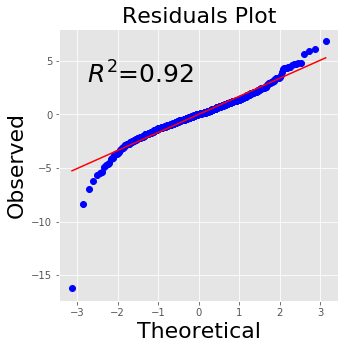

In [34]:
fml = "Weight ~ Feed + Cu + Time"
md = sm.MixedLM.from_formula(fml, data, re_formula="Time", groups=data["Pig"], missing='drop')
mdf = md.fit()

fig, ax = plt.subplots(1,1,figsize=(5,5))

_, (__, ___, r) = sp.stats.probplot(mdf.resid, plot=ax, fit=True)
ax.annotate('$R^{2}$=%.2f'%(r**2), (.1,.8), fontsize=25
            ,xycoords = 'axes fraction')
ax.set_title('Residuals Plot',
             fontsize=22)
ax.set_xlabel('Theoretical',
             fontsize=22,
              c='black')
ax.set_ylabel('Observed',
              fontsize=22,
              c='black')
plt.show()

In [35]:
mdf.summary().tables[0]

,0,1,2,3
0,Model:,MixedLM,Dependent Variable:,Weight
1,No. Observations:,789,Method:,REML
2,No. Groups:,72,Scale:,3.6331
3,Min. group size:,10,Likelihood:,-1884.0969
4,Max. group size:,11,Converged:,No
5,Mean group size:,11.0,,


In [36]:
mdf.summary().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,17.441,1.664,10.480,0.000,14.179,20.702
Feed,0.154,0.012,13.266,0.000,0.132,0.177
Cu,0.959,0.738,1.299,0.194,-0.487,2.404
Time,4.593,0.207,22.204,0.000,4.188,4.999
Group Var,25.654,2.446,,,,
Group x Time Cov,-0.888,0.283,,,,
Time Var,0.471,0.069,,,,
